Iteration: 0, train loss: 177.96923828125
2025-01-08 17:05:29, Iteration: 0, Test Loss: 80.88079071044922


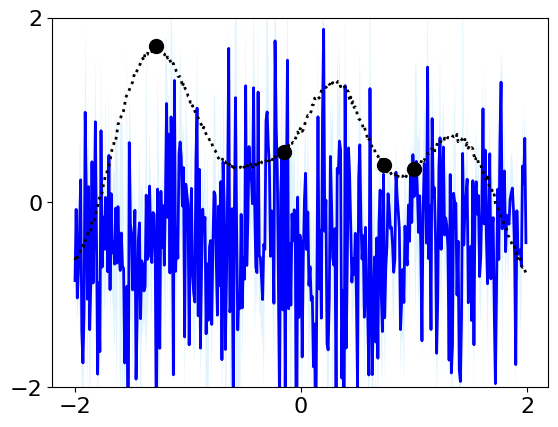

Iteration: 1000, train loss: 1.3663519620895386
Iteration: 2000, train loss: 1.0338196754455566
Iteration: 3000, train loss: 0.8649807572364807
Iteration: 4000, train loss: 0.7587524056434631
Iteration: 5000, train loss: 0.5191007852554321
Iteration: 6000, train loss: 0.42064395546913147
Iteration: 7000, train loss: 0.2932988107204437
Iteration: 8000, train loss: -0.05867907777428627
Iteration: 9000, train loss: -0.08484986424446106
Iteration: 10000, train loss: 0.06941711157560349
Iteration: 11000, train loss: -0.15958045423030853
Iteration: 12000, train loss: -0.2366655170917511
Iteration: 13000, train loss: -0.3616674840450287
Iteration: 14000, train loss: -0.16397826373577118
Iteration: 15000, train loss: -0.31156614422798157
Iteration: 16000, train loss: -0.3012430965900421
Iteration: 17000, train loss: -0.28177982568740845
Iteration: 18000, train loss: -0.35235291719436646
Iteration: 19000, train loss: -0.22997362911701202
Iteration: 20000, train loss: -0.2898239195346832
2025-01

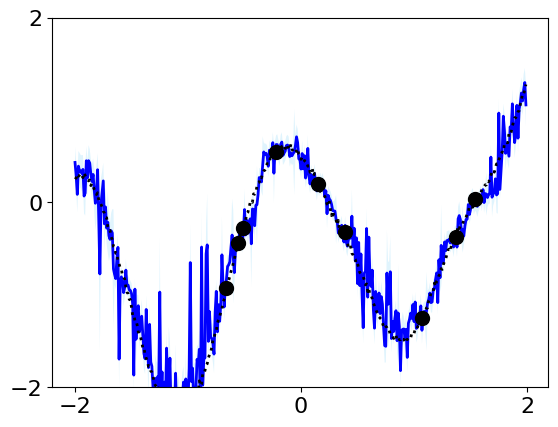

Iteration: 21000, train loss: -0.4391818642616272
Iteration: 22000, train loss: -0.23546916246414185
Iteration: 23000, train loss: -0.5029928088188171
Iteration: 24000, train loss: -0.6270312070846558
Iteration: 25000, train loss: -0.49142205715179443
Iteration: 26000, train loss: -0.6058642268180847
Iteration: 27000, train loss: -0.7038407325744629
Iteration: 28000, train loss: -0.5764291882514954
Iteration: 29000, train loss: -0.6809597015380859
Iteration: 30000, train loss: -0.5330855250358582
Iteration: 31000, train loss: -0.6006202697753906
Iteration: 32000, train loss: -0.75232994556427
Iteration: 33000, train loss: -0.7717478275299072
Iteration: 34000, train loss: -0.7680323123931885
Iteration: 35000, train loss: -0.7540777325630188
Iteration: 36000, train loss: -0.8305103182792664
Iteration: 37000, train loss: -0.725756824016571
Iteration: 38000, train loss: -0.8521506786346436
Iteration: 39000, train loss: -0.877868115901947
Iteration: 40000, train loss: -0.7222450971603394
20

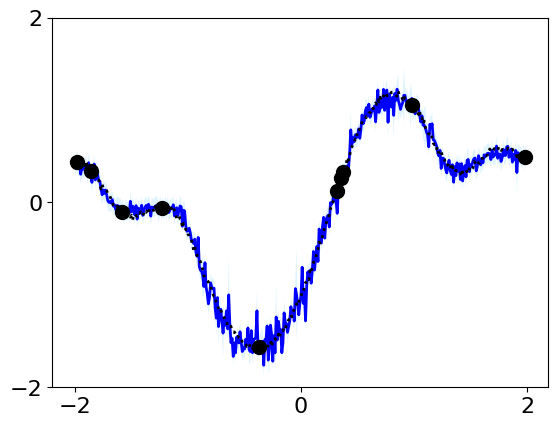

Iteration: 41000, train loss: -0.9002461433410645
Iteration: 42000, train loss: -0.8848166465759277
Iteration: 43000, train loss: -0.8402894139289856
Iteration: 44000, train loss: -0.9200055599212646
Iteration: 45000, train loss: -0.9321357011795044
Iteration: 46000, train loss: -0.9232515096664429
Iteration: 47000, train loss: -0.8803866505622864
Iteration: 48000, train loss: -0.9149786829948425
Iteration: 49000, train loss: -0.9313135147094727
Iteration: 50000, train loss: -0.9098230004310608
Iteration: 51000, train loss: -1.013629674911499
Iteration: 52000, train loss: -0.9303570985794067
Iteration: 53000, train loss: -0.915492594242096
Iteration: 54000, train loss: -0.9604069590568542
Iteration: 55000, train loss: -0.9797346591949463
Iteration: 56000, train loss: -0.9890134334564209
Iteration: 57000, train loss: -1.0021588802337646
Iteration: 58000, train loss: -0.9978780746459961
Iteration: 59000, train loss: -1.0161041021347046
Iteration: 60000, train loss: -1.053524374961853
202

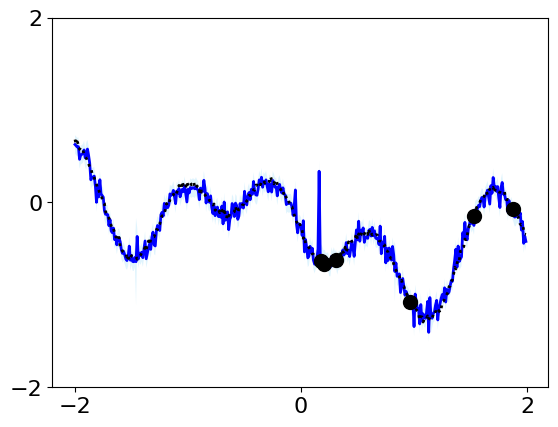

Iteration: 61000, train loss: -1.055822730064392
Iteration: 62000, train loss: -1.0522438287734985
Iteration: 63000, train loss: -0.9113129377365112
Iteration: 64000, train loss: -1.0104265213012695
Iteration: 65000, train loss: -0.9652556777000427
Iteration: 66000, train loss: -0.9309104681015015
Iteration: 67000, train loss: -1.0529099702835083
Iteration: 68000, train loss: -1.058784008026123
Iteration: 69000, train loss: -0.9473559260368347
Iteration: 70000, train loss: -0.807410478591919
Iteration: 71000, train loss: -1.0746629238128662
Iteration: 72000, train loss: -1.079689860343933
Iteration: 73000, train loss: -1.0608755350112915
Iteration: 74000, train loss: -0.8959152102470398
Iteration: 75000, train loss: -0.871130645275116
Iteration: 76000, train loss: -1.0386658906936646
Iteration: 77000, train loss: -1.0929874181747437
Iteration: 78000, train loss: -0.9515584111213684
Iteration: 79000, train loss: -0.9545674324035645
Iteration: 80000, train loss: -1.022644281387329
2025-0

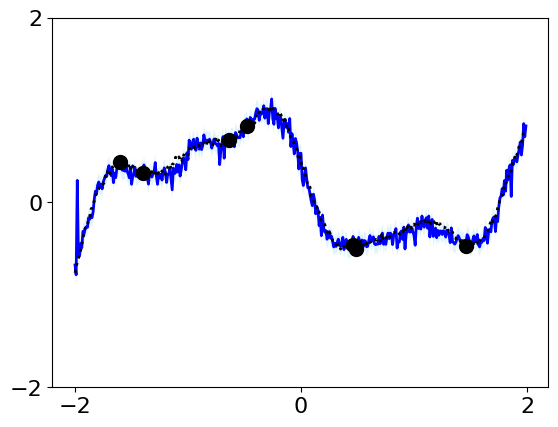

Iteration: 81000, train loss: -1.063159704208374
Iteration: 82000, train loss: -0.9586646556854248
Iteration: 83000, train loss: -0.8431908488273621
Iteration: 84000, train loss: -1.1079803705215454


KeyboardInterrupt: 

In [4]:
import os
# os.chdir("drive/MyDrive/fyp/src")

from neural_process.models.np import CNP, LNP
from neural_process.models.attnnp import AttnCNP, AttnLNP

import datetime
import torch
from torch.distributions.kl import kl_divergence

from modules import NLLLoss, ELBOLoss

from data import GPCurvesReader
from utils import plot_functions

TRAINING_ITERATIONS = int(2e5)
PLOT_AFTER = int(2e4)
MAX_CONTEXT_POINTS = 10
torch.manual_seed(0)

# Train dataset
dataset_train = GPCurvesReader(batch_size=64, max_num_context=MAX_CONTEXT_POINTS)
# Test dataset
dataset_test = GPCurvesReader(
    batch_size=100, max_num_context=MAX_CONTEXT_POINTS, testing=True
)

criterion = ELBOLoss()

# Model
model = AttnLNP(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
for it in range(TRAINING_ITERATIONS+1):
    # Sample a batch from the training dataset
    data_train = dataset_train.generate_curves()
    context_x, context_y, target_x, target_y, num_targets, _ = data_train

    optimizer.zero_grad()
    dist, z, q_zc, q_zct = model(context_x, context_y, target_x, target_y)
    # log_prob = None if target_y is None else dist.log_prob(target_y)
    # # kl = kl_divergence(q_zct, q_zc)
    # # kl = kl.sum(dim=-1, keepdim=True)
    # # loss = torch.mean(log_prob.squeeze(0) - kl / float(num_targets))
    # loss = -log_prob.mean()
    loss = criterion(dist, q_zct, q_zc, target_y)
    # loss = criterion(dist, target_y)
    loss.backward()
    optimizer.step()

    if it % 1000 == 0:
        print("Iteration: {}, train loss: {}".format(it, loss))

    # Plot and print the loss every PLOT_AFTER iterations
    if it % PLOT_AFTER == 0:
        data_test = dataset_test.generate_curves()
        context_x, context_y, target_x, target_y, num_targets, _ = data_test
        test_dist, test_z, test_q_zc, test_q_zct = model(
            context_x, context_y, target_x, target_y
        )
        pred_y = test_dist.mean.mean(0)
        std = test_dist.stddev.mean(0)
        # test_log_prob = None if target_y is None else test_dist.log_prob(target_y)
        # # test_kl = kl_divergence(test_q_zct, test_q_zc)
        # # test_kl = test_kl.sum(dim=-1, keepdim=True)
        # # test_loss = -torch.mean(test_log_prob.squeeze(0) - test_kl / float(num_targets))
        # test_loss = -test_log_prob.mean()
        test_loss = criterion(test_dist, test_q_zct, test_q_zc, target_y)
        # test_loss = criterion(test_dist, target_y)

        print(
            "{}, Iteration: {}, Test Loss: {}".format(
                datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), it, test_loss
            )
        )

        plot_functions(
            target_x.detach().numpy(),
            target_y.detach().numpy(),
            context_x.detach().numpy(),
            context_y.detach().numpy(),
            pred_y.detach().numpy(),
            std.detach().numpy(),
        )


In [5]:
torch.save(model.state_dict(), "/content/models/" + model.__class__.__name__ + ".pt")